In [22]:
import numpy as np
from numpy import argmax
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
from keras.models import load_model
import tensorflow as tf
from tensorflow.keras import layers

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255
x_test = x_test/255

In [3]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


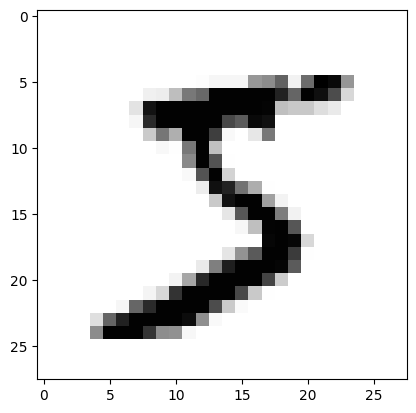

In [4]:
plt.imshow(x_train[0], cmap='Greys')

In [5]:
model= tf.keras.models.Sequential([
        layers.Input(x_train.shape[1:]),
        layers.Flatten(),
        layers.Dense(10, activation='softmax')
    ])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
#y_onehot_train = tf.one_hot(y_train, 10)
#model.fit(x_train, y_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9154 - loss: 0.3086


In [6]:
history= model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=False)

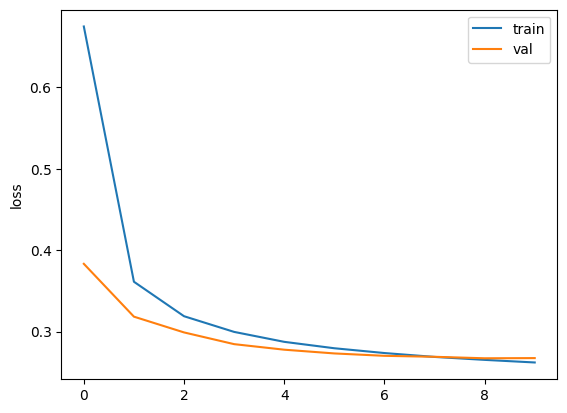

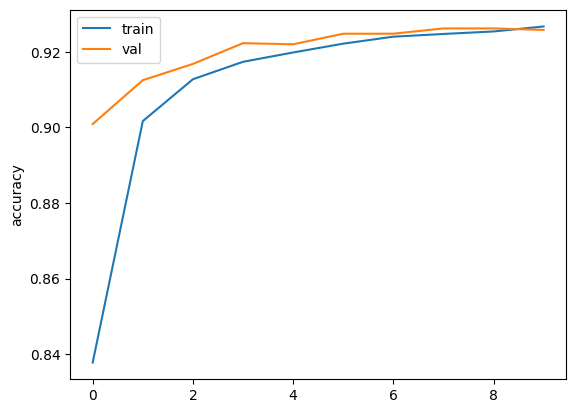

In [8]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [9]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9149 - loss: 0.3031


[0.2674197554588318, 0.9258000254631042]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
[1.1308469e-05 2.9992814e-10 2.8010592e-05 5.8426941e-03 6.8601133e-07
 3.2602366e-05 2.6843792e-09 9.9360472e-01 3.2677101e-05 4.4721033e-04]  =>  7


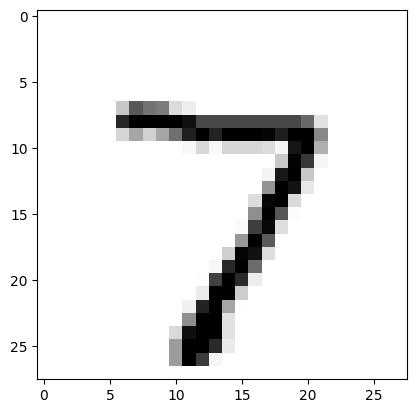

[9.4783620e-04 7.7922014e-06 9.8625100e-01 5.2956102e-04 9.8730453e-13
 6.2705167e-03 5.8007049e-03 9.0355893e-15 1.9259242e-04 1.5756282e-11]  =>  2


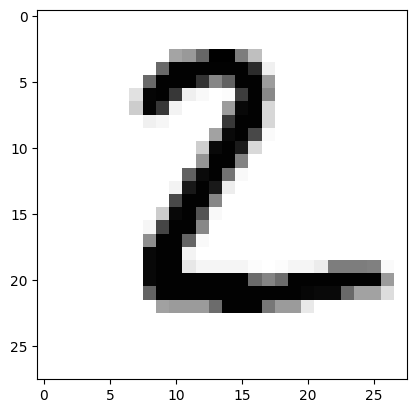

[8.3630712e-06 9.7594666e-01 1.1836991e-02 3.1535397e-03 1.9110256e-04
 7.8556035e-04 1.1463633e-03 1.8038715e-03 4.7688019e-03 3.5867255e-04]  =>  1


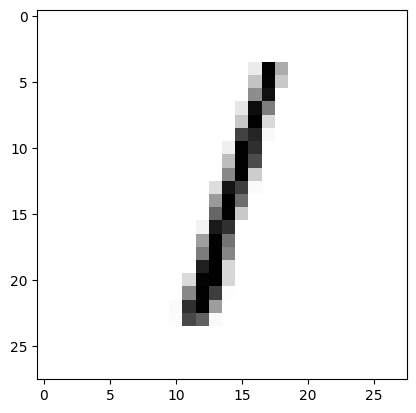

[9.9983752e-01 3.5960859e-11 3.6523335e-05 2.4764795e-06 3.1913121e-08
 5.7925889e-05 3.5217592e-05 8.2398847e-06 1.4860577e-05 7.1377544e-06]  =>  0


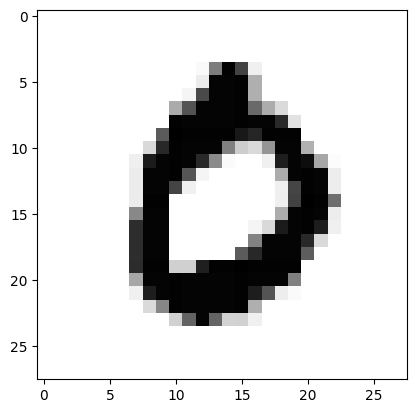

[4.0189287e-04 9.8799467e-07 1.6534386e-03 3.6922400e-05 9.6649051e-01
 1.2263717e-04 1.0641057e-03 2.0907642e-03 3.7049048e-03 2.4433838e-02]  =>  4


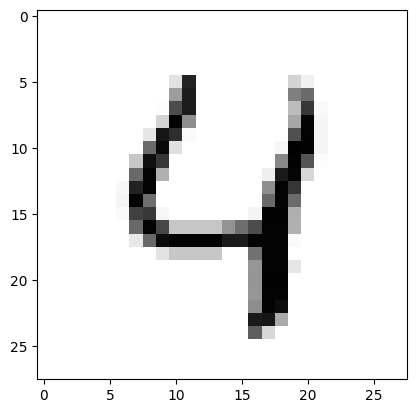

In [31]:
probs=model.predict(x_test[:5])
preds=np.argmax(probs,axis=1)
for i in range(5):
    print(probs[i], " => ", preds[i])
    plt.imshow(x_test[i], cmap="Greys")
    plt.show()

In [13]:
model_mlp = tf.keras.models.Sequential([
        layers.Input(x_train.shape[1:]),
        layers.Flatten(),
        layers.Dense(64, activation='elu'),
        layers.Dense(10, activation='softmax')
    ])
model_mlp.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_mlp.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model_mlp.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=False)

In [18]:
 model.save('my_model.keras')

In [27]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np


model.save('my_model.keras')

def load_image(filename):
    
    img = load_img(filename, target_size=(28, 28), color_mode="grayscale")
    
    img = img_to_array(img)
   
    img = img.reshape(1, 28, 28, 1)
   
    img = img.astype('float32')
    img = img / 255.0
    return img

def run_example():
    
    img = load_image("C:\\Users\\kalya\\OneDrive\\Pictures\\Screenshots\\Screenshot 2024-06-19 114621.png")
    
    model = load_model('my_model.keras')
    
    predict_value = model.predict(img)
    digit = np.argmax(predict_value)
    print(digit)

run_example()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
7
